In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load data file 

my_file = '/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex1/ex1/ex1data1.txt'

my_data = np.loadtxt(my_file, delimiter=',')

In [3]:
# Warm up

A = np.identity(5)
print np.matrix(A)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


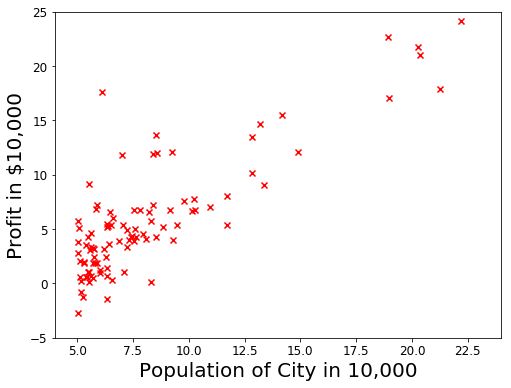

In [14]:
# Linear Regression with one variable
# first visualize the data

figure = plt.figure(figsize=(8,6))
plt.scatter(my_data[:,0], my_data[:,1], marker = 'x', color='r')
plt.xlabel("Population of City in 10,000", fontsize=20)
plt.ylabel("Profit in $10,000", fontsize = 20)
plt.tick_params(axis='both', labelsize=12)
plt.xlim(4, 24)
plt.ylim(-5, 25)
plt.show()

In [15]:
# apply gradient descent to find the theta parameters

x = my_data[:,0]
y = my_data[:,1]

# now add a column of ones to X matrix for intercept term 
x = np.c_[np.ones(len(x)), x]
y = np.reshape(y,(len(y), 1))

#print np.shape(x), np.shape(y)

In [91]:
# initalize some parameters

theta = np.zeros((2, 1))
m = len(y)
alpha = 0.01
iters = 1500

In [92]:
# Compute cost function J

def computeCost(x, y, theta):
    m = len(y)
    h = np.dot(x, theta)
    diff = np.subtract(h, y)
    sqrError = diff**2
    return (1/(2.0*m))*np.sum(sqrError)

In [93]:
# produces correct value with test data and initial theta values 
# also tested on additional test cases

computeCost(x, y, theta)

32.072733877455676

In [199]:
# compute gradient descent 

def gradDescent(theta, x, y, alpha, iters):
    m = len(y)
    J_history = np.zeros((iters, 1))
    #theta_history = np.zeros((iters, np.shape(theta)[0]))
    
    for i in range(iters):
        h = np.dot(x,theta)
        diff = np.subtract(h, y)
        prod = np.dot(np.transpose(x), diff)
        theta = theta - (alpha/m)*prod
        
        #theta_history[i, :] = np.transpose(theta)
        J_history[i] = computeCost(x, y, theta)
        
    return theta, J_history #theta_history

In [95]:
theta, J_history, theta_history = gradDescent(theta, x, y, alpha, iters)

print("Optimum values for theta are: \n theta0: {}, theta1: {}".format(theta[0], theta[1]))

Optimum values for theta are: 
 theta0: [-3.63029144], theta1: [ 1.16636235]


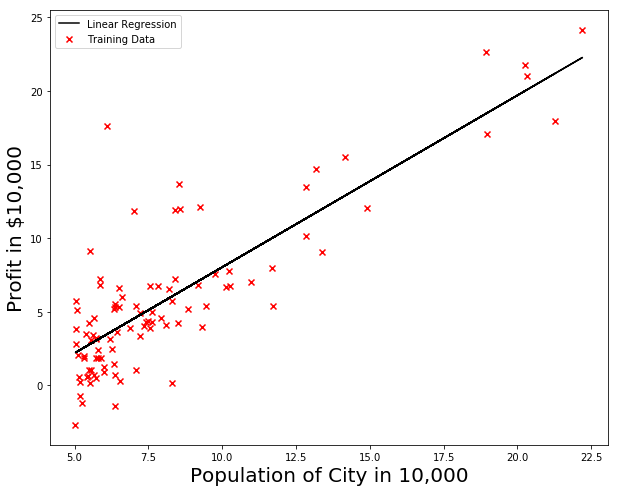

In [96]:
# now plot hypothesis on data
fig = plt.figure(figsize=((10, 8)))

plt.scatter(my_data[:,0], y, marker = 'x', color='r', label = 'Training Data')
plt.plot(my_data[:,0], np.dot(x, theta), color='k', label = "Linear Regression")
plt.xlabel("Population of City in 10,000", fontsize=20)
plt.ylabel("Profit in $10,000", fontsize = 20)
plt.legend()
plt.show()

In [97]:
x1 = np.array([1, 3.5])
predict1 = np.dot(x1, theta)*10000

x2 = np.array([1, 7])
predict2 = np.dot(x2, theta)*10000

print('For a population of {} we predict a profit of {}\n'.format('35,000', predict1))
print('For a population of {} we predict a profit of {}\n'.format('70,000', predict2))

For a population of 35,000 we predict a profit of [ 4519.7678677]

For a population of 70,000 we predict a profit of [ 45342.45012945]



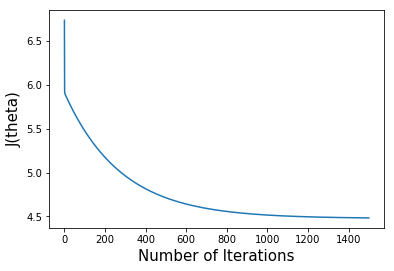

In [98]:
plt.plot(np.arange(0,iters), J_history)
plt.xlabel("Number of Iterations", fontsize = 15)
plt.ylabel("J(theta)", fontsize = 15)
plt.show()

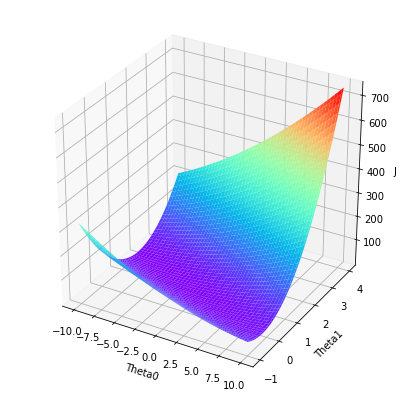

In [116]:
# now create surface plot of J values for different theta choices
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# create grid of theta0 and theta1 values you want to take on 
Xs, Ys = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-1, 4, 100))
# loops through all possible combinations of theta values and computes the cost at each step 
J_vals = np.array([computeCost(x, y, [[t0], [t1]]) for t0, t1 in zip(np.ravel(Xs), np.ravel(Ys))])
# reshape cost array to match the shape of the meshgrid 
J_vals = np.reshape(Zs, Xs.shape)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection="3d") # gca means get current axis instance for figure, here 3D
ax.set_xlabel('Theta0')
ax.set_ylabel('Theta1')
ax.set_zlabel('J')
#ax.view_init(elev=25, azim=40)
ax.plot_surface(Xs, Ys, J_vals, cmap=cm.rainbow)
plt.show()

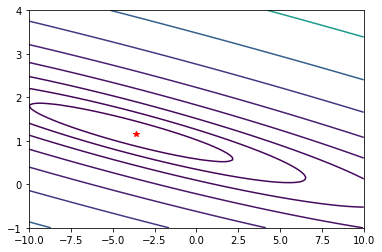

In [119]:
# now plot contour plot of J as a function of Theta0, Theta1

ax = plt.figure().gca()
ax.plot(theta[0], theta[1], 'r*')
plt.contour(Xs, Ys, J_vals, np.logspace(-2, 3, 20))
plt.show()

In [193]:
## now repeat testing functions with multi-variable regression

multi_file = my_file = '/Users/newowner/Desktop/DataScienceNotes/machine-learning-ex1/ex1/ex1data2.txt'
multi_data = np.loadtxt(multi_file, delimiter=',')

In [194]:
X = multi_data[:,:2]
y = multi_data[:,2]

In [150]:
print('Loading first 10 examples from dataset:\n')
for i in range(10):
    print('x = {}, y = {}'.format(X[i], y[i]))

Loading first 10 examples from dataset:

x = [ 2104.     3.], y = 399900.0
x = [ 1600.     3.], y = 329900.0
x = [ 2400.     3.], y = 369000.0
x = [ 1416.     2.], y = 232000.0
x = [ 3000.     4.], y = 539900.0
x = [ 1985.     4.], y = 299900.0
x = [ 1534.     3.], y = 314900.0
x = [ 1427.     3.], y = 198999.0
x = [ 1380.     3.], y = 212000.0
x = [ 1494.     3.], y = 242500.0


In [195]:
def featureNormalize(x):
    mu = np.ones((len(x), 1))*np.mean(x,0)
    std = np.ones((len(x), 1))*np.std(x,0, ddof=1)
    X_norm = (x-mu)/std
    return X_norm, mu, std

In [196]:
X, mu, sigma = featureNormalize(X)
X = np.c_[np.ones(len(X)), X]

In [178]:
computeCost(X, y, np.zeros((3,1)))

3082802761003.5

In [204]:
## still need to fix this cell, function not working for these values 

theta_multi = np.zeros((3, 1))
alpha = 0.03
iters = 400

new_theta, J0 = gradDescent(theta_multi, X, y, alpha, iters)

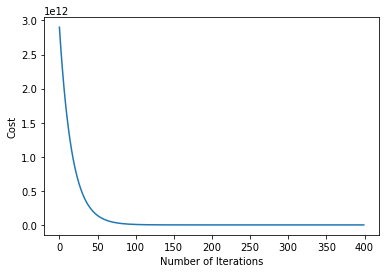

In [205]:
## fix this too 
plt.plot(np.arange(0, iters), J0)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [206]:
# now solve using the normal equation:

from numpy.linalg import inv

def normalEqn(x, y):
    return inv(X.T.dot(X)).dot(X.T).dot(y)

In [207]:
## this solves for theta correctly 
normalEqn(X, y)

array([ 340412.65957447,  110631.05027885,   -6649.47427082])